ECE 457B: Assignment 5

In [76]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from scipy.integrate import quad

# import warnings
# warnings.filterwarnings('ignore')

Value of integral M1 is 0.5232599803852603


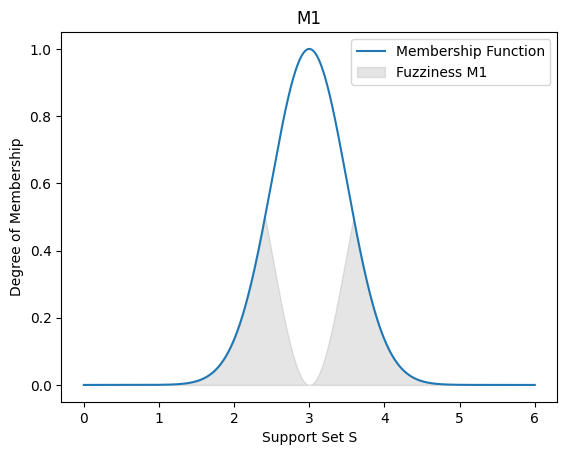

In [74]:
# define the membership function
def U(x):
    return np.exp(-2*(x-3)**2)

S = np.linspace(0, 6, 1000)

plt.plot(S, U(S), label='Membership Function')

def f(x):
    cond = np.less_equal(U(x), 0.5)
    return np.where(cond, U(x), 1 - U(x))

# M1 = np.trapz(f(S), S)
plt.fill_between(S, f(S), color='grey', alpha=0.2, label='Fuzziness M1')

integral, error = quad(f,0,6)
print(f"Value of integral M1 is {integral}")

plt.title('M1')
plt.legend()
plt.xlabel('Support Set S')
plt.ylabel('Degree of Membership')
plt.show()

Value of integral M2 is 0.5232599803852603


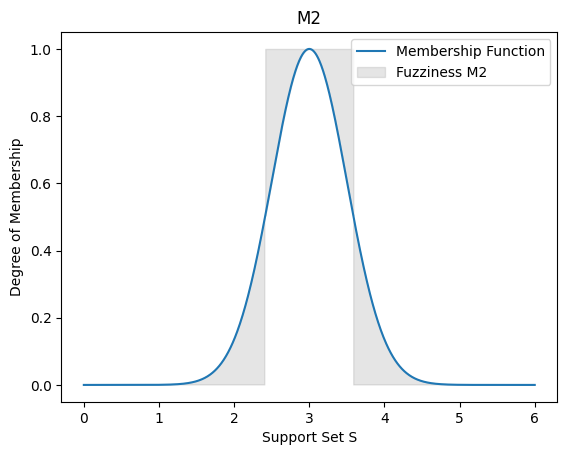

In [75]:

def alpha_cut(x):
    return np.where(U(x) >= 0.5, 1, 0)

alpha_half = alpha_cut(S)

# plot the membership function
plt.plot(S, U(S), label='Membership Function')

plt.fill_between(S, alpha_half, U(S), alpha=0.2, where=alpha_half<U(S), color='grey', label='Fuzziness M2')
plt.fill_between(S, alpha_half, U(S), alpha=0.2, where=alpha_half>U(S), color='grey')
plt.xlabel('Support Set S')
plt.ylabel('Degree of Membership')
plt.title('M2')
plt.legend()


def dist_half_cut(x):
    return np.abs(U(x) - alpha_cut(x))

integral, error = quad(dist_half_cut, 0, 6)
print(f"Value of integral M2 is {integral}")

plt.show()

Value of integral M3 is 4.953480039264709


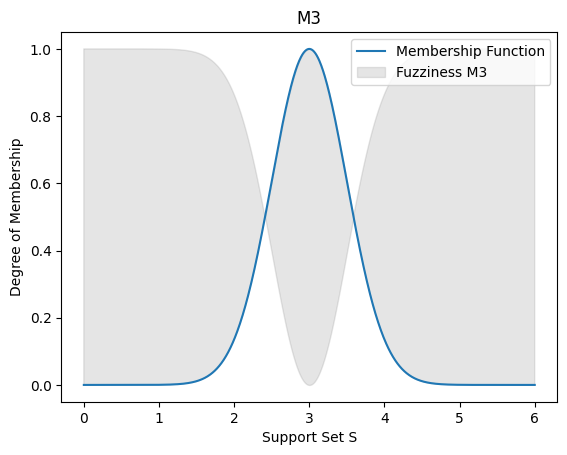

In [77]:


# plot the membership function
plt.plot(S, U(S), label='Membership Function')

U_values = U(S)
Ubar_values = 1 - U_values
plt.fill_between(S, U_values, Ubar_values, where=U_values>=Ubar_values, color='grey', alpha=0.2, label='Fuzziness M3')
plt.fill_between(S, U_values, Ubar_values, where=U_values<Ubar_values, color='grey', alpha=0.2)

plt.legend()
plt.xlabel('Support Set S')
plt.ylabel('Degree of Membership')
plt.title('M3')

def Ubar(x):
    return 1 - U(x)

def integrand(x):
    return np.abs(U(x) - Ubar(x))

integral, error = quad(integrand, 0, 6)
print(f"Value of integral M3 is {integral}")


plt.show()
